In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

def merge_on_matching_ids(file1, file2, file3):
    # Read CSV files into DataFrames
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)
    df3 = pd.read_csv(file3)

    # Merge DataFrames on 'beer' and 'beer_id' columns using inner join to include only matching IDs
    merged_df = df1.merge(df2, on=['beer'], how='inner', suffixes=('', '_y'))
    merged_df = merged_df.merge(df3, on=['beer'], how='inner', suffixes=('', '_y'))
    # Remove duplicate rows on suffix
    merged_df.drop(merged_df.filter(regex='_y$').columns, axis=1, inplace=True)
    return merged_df

# Example usage:
# File names must be adapted accordingly
file1 = 'C:/Users/stefa/Desktop/Studium/Master/Semester_2/DML/Project/beer-dataset/41467_2024_46346_MOESM4_ESM.csv'
file2 = 'C:/Users/stefa/Desktop/Studium/Master/Semester_2/DML/Project/beer-dataset/41467_2024_46346_MOESM7_ESM.csv'
file3 = 'C:/Users/stefa/Desktop/Studium/Master/Semester_2/DML/Project/beer-dataset/41467_2024_46346_MOESM10_ESM.csv'

merged_df = merge_on_matching_ids(file1, file2, file3)
#print(merged_df)
# Convert string in tasting_category_fine using factorize
merged_df['tasting_category_fine'], category_mapping = pd.factorize(merged_df['tasting_category_fine'])

# Optionally, write the result to a CSV file
merged_df.to_csv('C:/Users/stefa/Desktop/Studium/Master/Semester_2/DML/Project/beer-dataset/mergedData.csv', index=False)
# Not working
#merged_df.to_csv('C:/Users/stefa/Desktop/Studium/Master/Semester_2/DML/Project/beer-dataset/mergedData.csv', index=False, quoting=csv.QUOTE_ALL)

In [12]:
# Do some analysis on the data
# 1. Count the number of NAs in each row
merged_df['na_count'] = merged_df.isna().sum(axis=1)
# 1.1 Count the number of NAs in each Column
# 2. Count the number of NAs in each column
na_counts_per_column = merged_df.isna().sum()
#print("\nNumber of NAs in each column:")
#print(na_counts_per_column)
na_counts_per_column = na_counts_per_column[na_counts_per_column > 0]

In [13]:
# Define the threshold for NA counts
threshold = 30
# Filter to show only columns with NA counts greater than the threshold
columns_to_drop = na_counts_per_column[na_counts_per_column > threshold].index
# Drop the columns with NA counts greater than the threshold
merged_df_withoutNa = merged_df.drop(columns=columns_to_drop)

# Replace NAs in the remaining columns with 0
merged_df_withoutNa = merged_df_withoutNa.fillna(0)
# Optionally, write the result to a CSV file
merged_df_withoutNa.to_csv('C:/Users/stefa/Desktop/Studium/Master/Semester_2/DML/Project/beer-dataset/mergedDataWithoutNAs.csv', sep=';', decimal=",", index=False)

In [20]:
# 2. Calculate highest, lowest, mean, and median values for each column that is numerical
numeric_df = merged_df.select_dtypes(include=[np.number])

statistics = numeric_df.describe().T
statistics['median'] = numeric_df.median()

#print("\nStatistics for each numerical column:")
#print(statistics[['min', 'max', 'mean', '50%', 'median']])
# Optional: Write the statistics to a CSV file
statistics.to_csv('C:/Users/stefa/Desktop/Studium/Master/Semester_2/DML/Project/beer-dataset/columnStatistics.csv')


Statistics for each numerical column:
                        min           max          mean           50%  \
beer               1.000000  2.500000e+02  1.255000e+02  1.255000e+02   
beer_id_x       1882.000000  9.120041e+12  4.602340e+12  5.411663e+12   
acetaldehyde      -1.902829  1.268628e+00  5.789827e-01  6.132897e-01   
CS2               -2.146292 -8.552402e-03 -1.898397e+00 -2.146292e+00   
DES               -1.905267  6.716467e-01 -3.700935e-01 -2.121628e-01   
...                     ...           ...           ...           ...   
taste_stale       -0.571463  7.883652e+00 -1.808680e-03 -4.613347e-01   
taste_sweet       -2.226407  3.119457e+00  1.193664e-03 -1.519939e-02   
taste_toast       -0.698196  8.189947e+00  1.714004e-03 -3.247892e-01   
taste_tropical    -0.540469  6.419687e+00 -2.019682e-02 -4.204801e-01   
taste_woody       -0.721040  5.408718e+00  2.440681e-03 -3.457760e-01   

                      median  
beer            1.255000e+02  
beer_id_x       5.4116

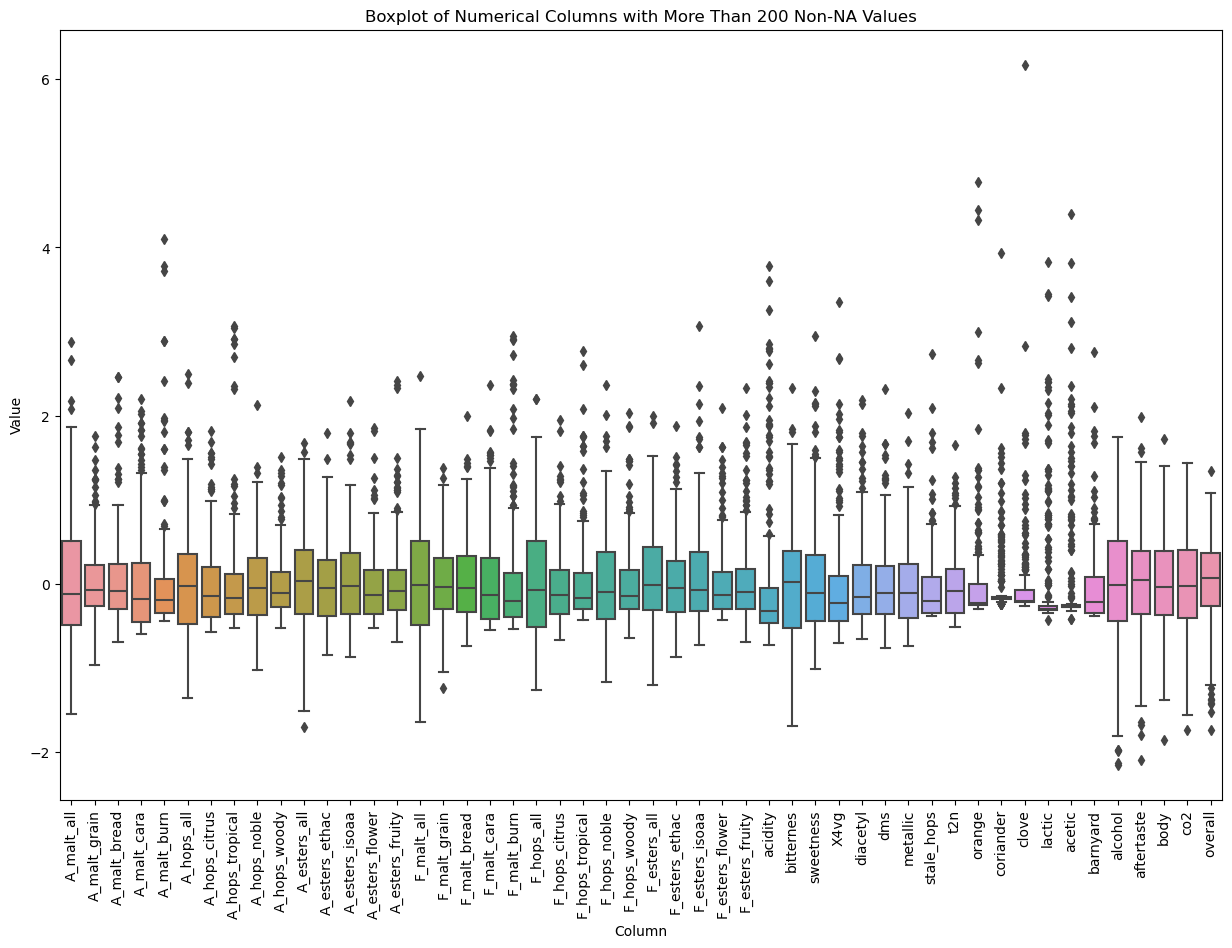

In [29]:
# Read CSV files into DataFrames
df2 = pd.read_csv(file2)
# Select columns excluding the first two
columns_to_include = df2.columns[2:]
# Select only numerical columns
numeric_df2 = df2[columns_to_include].select_dtypes(include=[np.number])
filtered_numeric_df2 = numeric_df2.loc[:, numeric_df2.count() > 200]

# Plotting boxplots for each filtered numerical column
plt.figure(figsize=(15, 10))
sns.boxplot(data=numeric_df2)
plt.title('Boxplot of Numerical Columns with More Than 200 Non-NA Values')
plt.xlabel('Column')
plt.ylabel('Value')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

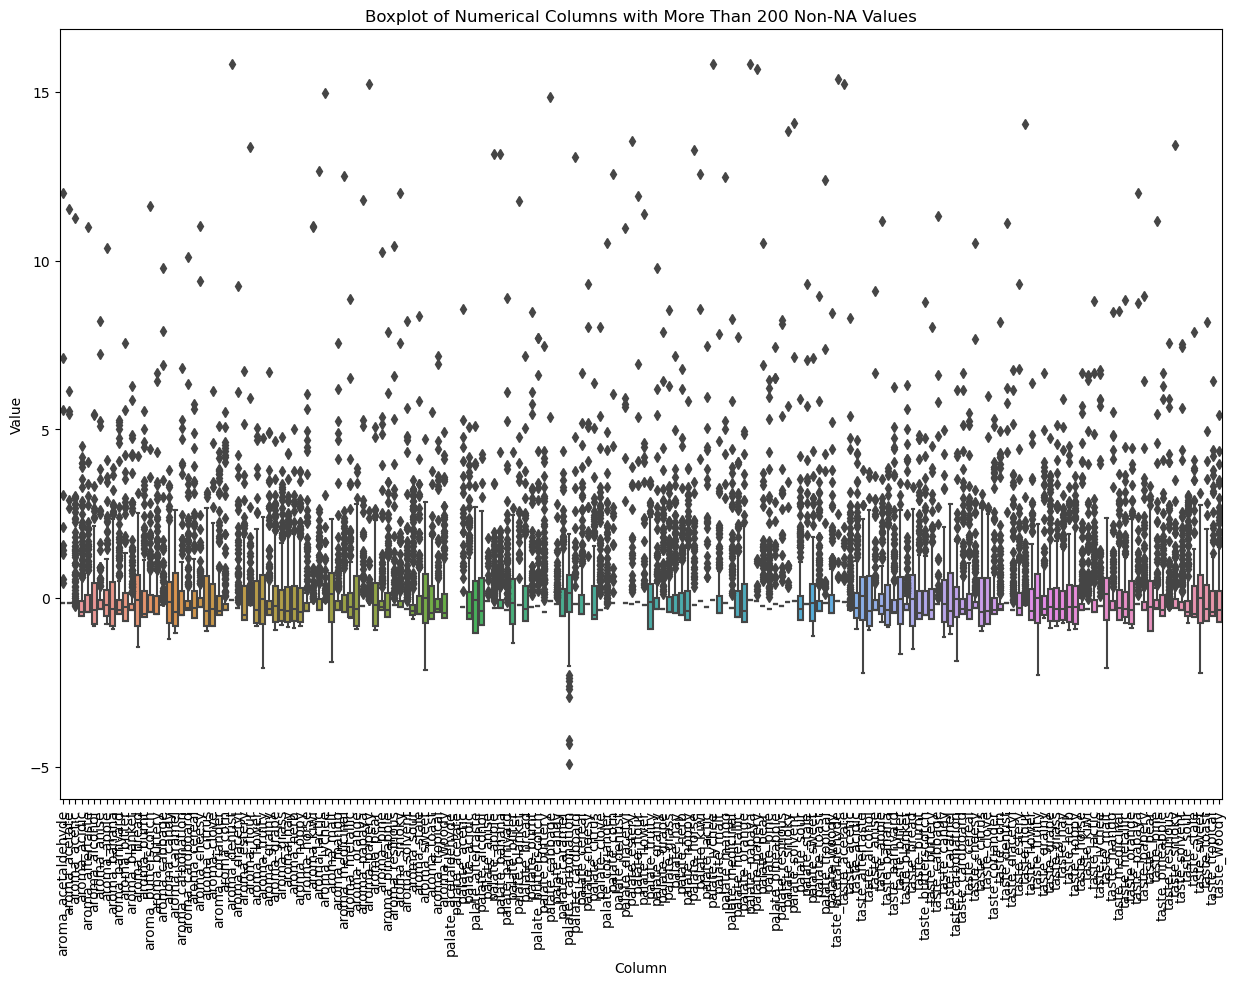

In [30]:
# Read CSV files into DataFrames
df3 = pd.read_csv(file3)
# Select columns excluding the first two
columns_to_include = df3.columns[2:]
# Select only numerical columns
numeric_df3 = df3[columns_to_include].select_dtypes(include=[np.number])
filtered_numeric_df3 = numeric_df3.loc[:, numeric_df3.count() > 200]

# Plotting boxplots for each filtered numerical column
plt.figure(figsize=(15, 10))
sns.boxplot(data=numeric_df3)
plt.title('Boxplot of Numerical Columns with More Than 200 Non-NA Values')
plt.xlabel('Column')
plt.ylabel('Value')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
# Optionally, write the result to a CSV file
merged_df.to_csv('C:/Users/stefa/Desktop/Studium/Master/Semester_2/DML/Project/beer-dataset/mergedData.csv', index=False)